<a href="https://colab.research.google.com/github/LKXoro/BEDU-Rstudio-postworks/blob/main/M3_ProyectoFinal/Proyecto_final_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Aportar un Dataset para el análisis de eSports y aplicaciones de ML

Con la finalidad de aterrizar los conocimientos adquiridos durante este tercer módulo de _Procesamiento de datos con python_ nos dimos a la tarea de retomar algunos datos de nuestro proyecto anterior y obtener un modelo que podamos comparar utilizando nuestro Dataset que obtuvimos a partir de la API PandaScore. Como primer paso importamos las paqueterías que vamos a utilizar:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En el proyecto pasado empezamos con análisis generales de los dataset, en particular nos interesaba conocer los jugadores, torneos y ganancias a lo largo de los años. Una vez realizado esto, se entró a fondo en cada género de juegos y se investigó nuevamente, cuales son los que más atraen jugadores, torneos y ganancias.


Gracias a los resultados obtenidos se tiene que los géneros más populares son:

        1.-  Multiplayer Online Battle Arena - MOBA
        2.-  First-Person Shooter - FBS
        3.-  Battle Royal
        4.-  Collectible Card - Cartas Coleccionables
        5.-  Sports - Deportes


De estos géneros, se obtiene que los principales juegos son:

        1.-  Dota 2
        2.-  Counter - Strike
        3.-  Fornite
        4.-  Hearthstone
        5.-  Rocket League
        
        
Empecemos el análisis observando el cambio de estos juegos a lo largo de los años, con las variables correspondientes a jugadores, torneos y ganancias.

In [ ]:
#Importamos los dataset
esports = pd.read_csv("https://raw.githubusercontent.com/LKXoro/BEDU-Rstudio-postworks/main/Proyecto/DataSets/ESport_Earnings.csv", encoding="ISO-8859-1")
historical = pd.read_csv("https://raw.githubusercontent.com/LKXoro/BEDU-Rstudio-postworks/main/Proyecto/DataSets/HistoricalEsportData.csv",encoding="ISO-8859-1")


Ya que nos enfocamos en los esports y como han avanzado a lo largo de los años, uniremos los dataset correspondientes a historical y esports, para que nuestra información sea la misma que se reporta en los Esports.

In [ ]:
#Cambiamos el nombre de una de las columnas de los esports
esports = esports.rename(columns = {"GameName":"Game"}) 

In [ ]:
#Imprimimos carácteristicas de nuestros dataframe
print(esports.shape)
print(esports.info(), "\n")
print(historical.shape)
print(historical.info())

(504, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   IdNo                  504 non-null    int64  
 1   TotalMoney            504 non-null    float64
 2   Game                  504 non-null    object 
 3   Genre                 504 non-null    object 
 4   PlayerNo              504 non-null    int64  
 5   TournamentNo          504 non-null    int64  
 6   Top_Country           504 non-null    object 
 7   Top_Country_Earnings  504 non-null    float64
 8   Releaseyear           504 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.6+ KB
None 

(6387, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6387 non-null   object 
 1   Game     

Imprimimos encabezados


In [ ]:
esports.head()

,IdNo,TotalMoney,Game,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear
0,613,310.00,Acceleration of SUGURI 2,Fighting Game,6,2,United States,310.00,2018
1,510,190075.61,Age of Empires,Strategy,246,95,Viet Nam,123408.43,1997
2,179,1492489.51,Age of Empires II,Strategy,956,576,China,174252.44,1999
3,177,68113.85,Age of Empires III,Strategy,106,76,United States,18523.52,2005
4,540,2668.00,Age of Empires Online,Strategy,16,7,Germany,1264.00,2011


In [ ]:
historical.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


El dataframe de historical contiene información de cuando se realizaron los torneos de los esports las ganancias que se producieron y los jugadores que hubo, esta fecha la pasaremos a su respectivo formato.

In [ ]:
import datetime as dt

Fechas = historical['Date']

Fechas_Bien = []
for i in range(0, len(Fechas)):
    x = dt.datetime.strptime(historical["Date"][i],'%Y-%m-%d')
    Fechas_Bien.append(x)
#Fechas_Bien
historical["Date"] = Fechas_Bien
historical

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.00,8,1
1,1998-05-01,Quake II,14600.00,4,1
2,1998-07-01,Quake II,15000.00,5,1
3,1998-07-01,QuakeWorld,6500.00,4,1
4,1998-11-01,Quake II,36600.00,13,2
...,...,...,...,...,...
6382,2020-12-01,Age of Empires Online,626.56,3,1
6383,2020-12-01,Artifact 2.0,530.80,18,2
6384,2020-12-01,TrackMania 2: Stadium,316.23,6,2
6385,2020-12-01,Touhou Hisoutensoku ~ Choudokyuu Ginyoru no Na...,264.60,8,1


In [ ]:
#Notemos que el formato ya es el correcto
historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         6387 non-null   datetime64[ns]
 1   Game         6387 non-null   object        
 2   Earnings     6387 non-null   float64       
 3   Players      6387 non-null   int64         
 4   Tournaments  6387 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 249.6+ KB


In [ ]:
#Pasamos las ganancias a millones de dólares, para no tener valores tan excesivos
historical["Earnings"] = historical["Earnings"]/(10**6)
esports["Top_Country_Earnings"] = esports["Top_Country_Earnings"]/(10**6)
print(historical.head(),"\n")
print(esports.head())


#################### PARA LOCALIZAR EL MÁXIMO ##################################

#historical["Earnings"].max()
#36713555.9
#np.where(historical["Earnings"] == 36713555.9)
#historical.loc[5322]

        Date        Game  Earnings  Players  Tournaments
0 1998-01-01  QuakeWorld    0.0150        8            1
1 1998-05-01    Quake II    0.0146        4            1
2 1998-07-01    Quake II    0.0150        5            1
3 1998-07-01  QuakeWorld    0.0065        4            1
4 1998-11-01    Quake II    0.0366       13            2 

   IdNo  TotalMoney  ... Top_Country_Earnings Releaseyear
0   613      310.00  ...             0.000310        2018
1   510   190075.61  ...             0.123408        1997
2   179  1492489.51  ...             0.174252        1999
3   177    68113.85  ...             0.018524        2005
4   540     2668.00  ...             0.001264        2011

[5 rows x 9 columns]


Unimos los dataframe a partir de la función merge con la llave "Game" y observamos al información que nos devuelve

In [ ]:
join = pd.merge(esports,historical,on="Game",how="outer")
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IdNo                  6334 non-null   float64       
 1   TotalMoney            6334 non-null   float64       
 2   Game                  6433 non-null   object        
 3   Genre                 6334 non-null   object        
 4   PlayerNo              6334 non-null   float64       
 5   TournamentNo          6334 non-null   float64       
 6   Top_Country           6334 non-null   object        
 7   Top_Country_Earnings  6334 non-null   float64       
 8   Releaseyear           6334 non-null   float64       
 9   Date                  6397 non-null   datetime64[ns]
 10  Earnings              6397 non-null   float64       
 11  Players               6397 non-null   float64       
 12  Tournaments           6397 non-null   float64       
dtypes: datetime64[ns](

In [ ]:
#Primeras filas
join.head()

,IdNo,TotalMoney,Game,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear,Date,Earnings,Players,Tournaments
0,613.0,310.00,Acceleration of SUGURI 2,Fighting Game,6.0,2.0,United States,0.000310,2018.0,2019-09-01,0.00021,3.0,1.0
1,613.0,310.00,Acceleration of SUGURI 2,Fighting Game,6.0,2.0,United States,0.000310,2018.0,2020-06-01,0.00010,3.0,1.0
2,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,1998-12-01,0.00200,1.0,1.0
3,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,2000-04-01,0.00950,4.0,1.0
4,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,2002-09-01,0.00010,3.0,1.0


In [ ]:
join['Year'] = join.Date.dt.year
join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   IdNo                  6334 non-null   float64       
 1   TotalMoney            6334 non-null   float64       
 2   Game                  6433 non-null   object        
 3   Genre                 6334 non-null   object        
 4   PlayerNo              6334 non-null   float64       
 5   TournamentNo          6334 non-null   float64       
 6   Top_Country           6334 non-null   object        
 7   Top_Country_Earnings  6334 non-null   float64       
 8   Releaseyear           6334 non-null   float64       
 9   Date                  6397 non-null   datetime64[ns]
 10  Earnings              6397 non-null   float64       
 11  Players               6397 non-null   float64       
 12  Tournaments           6397 non-null   float64       
 13  Year              

In [ ]:
#Imprimimos el encabezado
join.head()

,IdNo,TotalMoney,Game,Genre,PlayerNo,TournamentNo,Top_Country,Top_Country_Earnings,Releaseyear,Date,Earnings,Players,Tournaments,Year
0,613.0,310.00,Acceleration of SUGURI 2,Fighting Game,6.0,2.0,United States,0.000310,2018.0,2019-09-01,0.00021,3.0,1.0,2019.0
1,613.0,310.00,Acceleration of SUGURI 2,Fighting Game,6.0,2.0,United States,0.000310,2018.0,2020-06-01,0.00010,3.0,1.0,2020.0
2,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,1998-12-01,0.00200,1.0,1.0,1998.0
3,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,2000-04-01,0.00950,4.0,1.0,2000.0
4,510.0,190075.61,Age of Empires,Strategy,246.0,95.0,Viet Nam,0.123408,1997.0,2002-09-01,0.00010,3.0,1.0,2002.0


In [ ]:
#Creamos un dataframe con columnas de intéres para realizar un analisis
join2 = join[["Game","Top_Country","Top_Country_Earnings","Earnings","Players","Tournaments",'Year']]
join2

,Game,Top_Country,Top_Country_Earnings,Earnings,Players,Tournaments,Year
0,Acceleration of SUGURI 2,United States,0.000310,0.000210,3.0,1.0,2019.0
1,Acceleration of SUGURI 2,United States,0.000310,0.000100,3.0,1.0,2020.0
2,Age of Empires,Viet Nam,0.123408,0.002000,1.0,1.0,1998.0
3,Age of Empires,Viet Nam,0.123408,0.009500,4.0,1.0,2000.0
4,Age of Empires,Viet Nam,0.123408,0.000100,3.0,1.0,2002.0
...,...,...,...,...,...,...,...
6428,Call of Duty: Black Ops Cold War,NaN,NaN,0.243000,80.0,9.0,2020.0
6429,Smash Remix,NaN,NaN,0.000299,4.0,1.0,2020.0
6430,Kirby Fighters 2,NaN,NaN,0.000223,4.0,1.0,2020.0
6431,Rogue Company,NaN,NaN,0.050000,48.0,2.0,2020.0


Hagamos una lista del nombre de los datos únicos, para observar y clasificar los de interés


In [ ]:
unicos = list(np.unique(join2['Game']))

Analizamos los juegos con mayor popularidad y verificamos que el año sea mayor a 2010 (en el proyecto pasado concluimos que vale la pena notar que los eSports tuvieron su auge en ese año)

In [ ]:
Rainbow = join2['Game'].str.match('^Rainbow Six')
Counter_Strike = join2['Game'].str.match('^Counter-Strike')
LOL = join2["Game"] == 'League of Legends'
Dota2 = join2["Game"] == 'Dota 2'
Rocket = join2["Game"] =='Rocket League' 
Hearthstone = join2["Game"] == 'Hearthstone'
mayor2010 = join2["Year"] >= 2010

join2  = join2[(LOL|Dota2|Rocket|Hearthstone|Rainbow|Counter_Strike) & mayor2010 ].reset_index(drop=True)
join2

,Game,Top_Country,Top_Country_Earnings,Earnings,Players,Tournaments,Year
0,Counter-Strike,Sweden,2.837398,0.085406,111.0,6.0,2010.0
1,Counter-Strike,Sweden,2.837398,0.063992,145.0,10.0,2010.0
2,Counter-Strike,Sweden,2.837398,0.142391,160.0,6.0,2010.0
3,Counter-Strike,Sweden,2.837398,0.098841,192.0,14.0,2010.0
4,Counter-Strike,Sweden,2.837398,0.086128,131.0,11.0,2010.0
...,...,...,...,...,...,...,...
611,Rocket League,United States,2.894739,0.335180,269.0,24.0,2020.0
612,Rocket League,United States,2.894739,0.482865,315.0,27.0,2020.0
613,Rocket League,United States,2.894739,0.484540,305.0,28.0,2020.0
614,Rocket League,United States,2.894739,0.283200,262.0,27.0,2020.0


Realizamos un análisis de que países han obtenido mayor ganancias en estos juegos

In [ ]:
#Agrupamos por país la cantidad de ganancias 
Paises_Ganancias = join2[["Top_Country","Top_Country_Earnings"]]
Paises_Ganancias = Paises_Ganancias.groupby(['Top_Country']).sum().reset_index()
Paises_Ganancias

,Top_Country,Top_Country_Earnings
0,China,7526.860666
1,Denmark,1584.038889
2,"Korea, Republic of",3262.209989
3,Sweden,107.821124
4,United States,358.609227


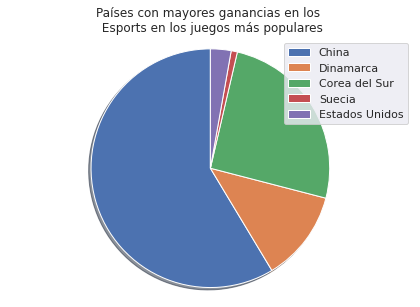

In [ ]:
#Realizamos una gráfica de pie

paises_espanol = ["China","Dinamarca","Corea del Sur","Suecia","Estados Unidos"]

labels = paises_espanol
sizes = Paises_Ganancias["Top_Country_Earnings"]

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Países con mayores ganancias en los \n Esports en los juegos más populares')

plt.show()

Creamos diversos grupos de los juegos de interés, realizando filtro para encontrar coincidencias, estos grupos se realizan a partir del nombre y los años y pasamos los años a una columna, ya que al realizar el agrupamiento este pasa como índice, entonces tenemos que volverlo a pasar a columna.

In [ ]:
################################################################
Rainbow = join2[join2['Game'].str.match('^Rainbow Six')== True] 
Rainbow = Rainbow.groupby(['Year']).sum()
Rainbow = Rainbow.rename_axis('Year').reset_index()
################################################################
Counter_Strike = join2[join2['Game'].str.match('^Counter-Strike')== True]
Counter_Strike = Counter_Strike.groupby(['Year']).sum()
Counter_Strike = Counter_Strike.rename_axis('Year').reset_index()
################################################################
LOL = join2[join2["Game"] == 'League of Legends']
LOL = LOL.groupby(['Year']).sum()
LOL = LOL.rename_axis('Year').reset_index()
################################################################
Dota2 = join2[join2["Game"] == 'Dota 2' ]                      
Dota2 = Dota2.groupby(['Year']).sum()
Dota2 = Dota2.rename_axis('Year').reset_index()
#################################################################
Rocket = join2[join2["Game"] == 'Rocket League' ]
Rocket = Rocket.groupby(['Year']).sum()
Rocket = Rocket.rename_axis('Year').reset_index()
################################################################
Hearthstone = join2[join2["Game"] == 'Hearthstone' ]
Hearthstone = Hearthstone.groupby(['Year']).sum()
Hearthstone = Hearthstone.rename_axis('Year').reset_index()
################################################################

In [ ]:
#Unimos los datafame de cada juego, esto para graficar su evolución a lo largo de los años 

########### LOS NaN nos sirven para que no aparezcan ceros en las gráficas, debido a esto no los retiramos 

Unidos = pd.concat([Rainbow,Counter_Strike, LOL,Dota2,Rocket,Hearthstone], axis=1, 
          keys=['Rainbow','Counter_Strike', 'LOL','Dota2','Rocket','Hearthstone'])
Unidos

Rainbow                                 ... Hearthstone                    
      Year Top_Country_Earnings  Earnings  ...    Earnings Players Tournaments
0   2016.0            17.755893  0.295680  ...    0.001395     3.0         3.0
1   2017.0            29.593155  0.863557  ...    1.123245   521.0       177.0
2   2018.0            35.511786  2.005274  ...    2.372584   967.0       251.0
3   2019.0            35.511786  5.018250  ...    3.455125   906.0       134.0
4   2020.0            26.633839  5.015764  ...    3.476623  1109.0       122.0
5      NaN                  NaN       NaN  ...    4.717852  1552.0       132.0
6      NaN                  NaN       NaN  ...    4.772553   982.0        43.0
7      NaN                  NaN       NaN  ...    4.232600   870.0        40.0
8      NaN                  NaN       NaN  ...         NaN     NaN         NaN
9      NaN                  NaN       NaN  ...         NaN     NaN         NaN
10     NaN                  NaN       NaN  ...         NaN     NaN         NaN

[11 rows x 30 columns]

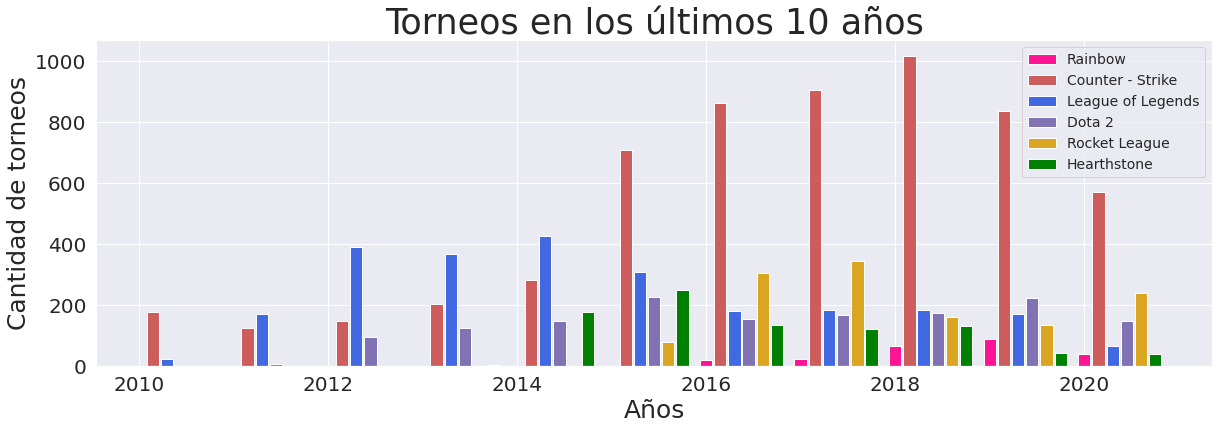

In [ ]:
def barras(parametro, parametro_espanol):
    fig, ax =  plt.subplots(figsize=(20,6))
    width = 0.13
    ax.bar(Unidos["Rainbow"]["Year"], Unidos["Rainbow"][parametro], 
           width,label='Rainbow', color = 'deeppink')
    
    ax.bar(Unidos["Counter_Strike"]["Year"]+0.15, Unidos["Counter_Strike"][parametro], 
           width,label='Counter - Strike', color = 'indianred')
    
    ax.bar(Unidos["LOL"]["Year"]+ 0.30, Unidos["LOL"][parametro], 
           width,label='League of Legends', color = 'royalblue')
    
    ax.bar(Unidos["Dota2"]["Year"]+ 0.45, Unidos["Dota2"][parametro], 
           width,label='Dota 2', color = 'm')
    
    ax.bar(Unidos["Rocket"]["Year"]+ 0.6, Unidos["Rocket"][parametro], 
           width,label='Rocket League', color = 'goldenrod')
    
    ax.bar(Unidos["Hearthstone"]["Year"]+ 0.75, Unidos["Hearthstone"][parametro], 
           width,label='Hearthstone', color = 'green')

    ax.set_xlabel('Años',size=25)
    if parametro_espanol == "Ganancias":
         ax.set_ylabel('Ganancias en millones de dólares',size=25)
    elif parametro_espanol == 'Torneos':
        ax.set_ylabel('Cantidad de torneos',size = 25)
    elif parametro_espanol == 'Jugadores':
        ax.set_ylabel('Cantidad de jugadores',size = 25)

        
    ax.set_title(parametro_espanol +' en los últimos 10 años',size=35)

    ax.grid(True, axis='x', color='white')
    ax.tick_params(axis ='both', labelsize = 20)
    sns.set(style="darkgrid")
    ax.legend(loc = 'best', fontsize=14)

    
torneos_barras = barras(parametro = "Tournaments", parametro_espanol = "Torneos")

plt.show()

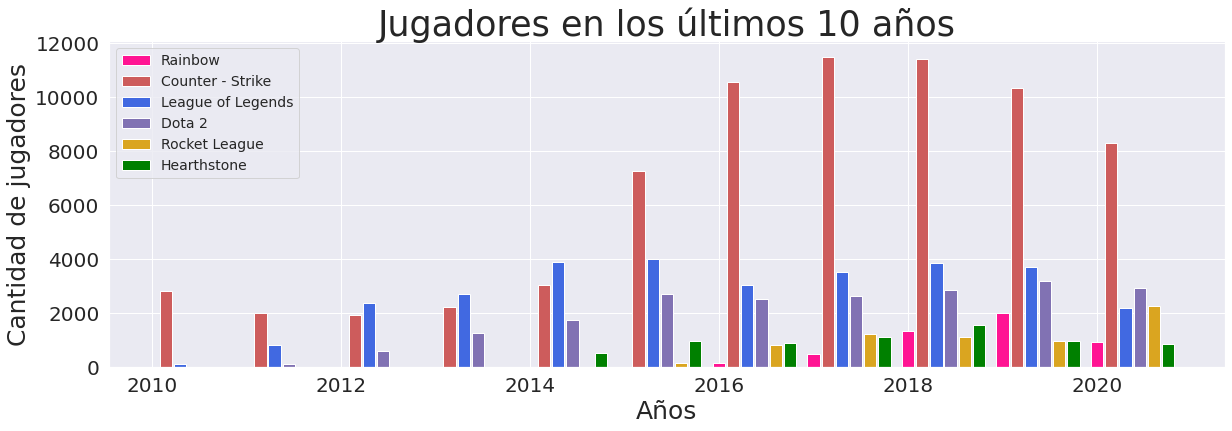

In [ ]:
jugadores_barras =  barras(parametro = "Players", parametro_espanol = "Jugadores")
plt.show()

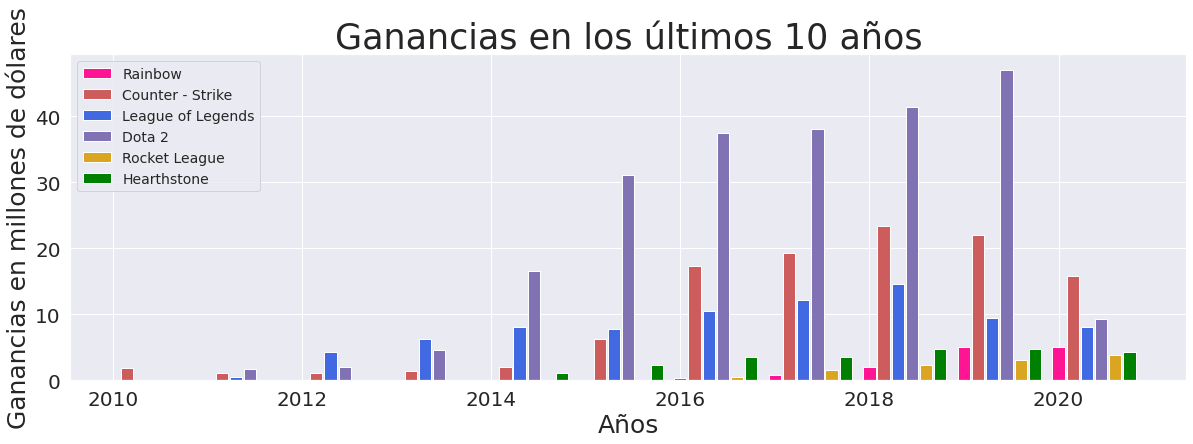

In [ ]:
ganancias_barras =  barras(parametro = "Earnings", parametro_espanol = "Ganancias")
plt.show()

Notamos que la cantidad de torneos y jugadores de Counter - Strike crecen de una manera similar, aquí nos surge una pregunta

        ¿Cuál es la relación entre estás variables?

Para hallar la relación entre estás variables primero "_plotiemos_" los valores de estás, para así visualizar que tipo de análisis sería el correcto


In [ ]:
#Volvamos a obtener la variable relacionado a Counter_Strike

Counter_Strike = join2[join2['Game'].str.match('^Counter-Strike')== True]
Counter_Strike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Game                  185 non-null    object 
 1   Top_Country           185 non-null    object 
 2   Top_Country_Earnings  185 non-null    float64
 3   Earnings              185 non-null    float64
 4   Players               185 non-null    float64
 5   Tournaments           185 non-null    float64
 6   Year                  185 non-null    float64
dtypes: float64(5), object(2)
memory usage: 11.6+ KB


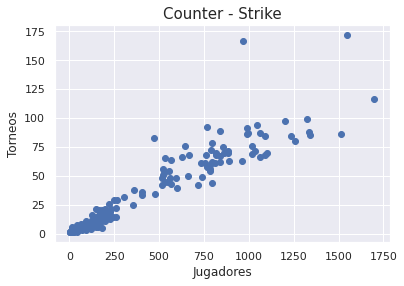

In [ ]:
#Gráfica para visualizar los datos
X = Counter_Strike["Players"].values    #Con esto se forma un vector
Y = Counter_Strike["Tournaments"].values   # 
plt.scatter(X,Y)
plt.xlabel('Jugadores'), plt.ylabel('Torneos')
plt.title("Counter - Strike", size=15)
plt.show()

Notamos que los datos parecieran tener una correlación positiva, implementemos un algoritmo de regresión lineal con Machine Learning para analizar esto a detalle, desde Scratch:


#### 1) Separar los datos de entrenamiento a los de test

In [ ]:
def separacionDatos(X,Y,tamanhoTest=0.2): #Para el entrenamiento
    m = Y.size #Número de datos que tenemos (Puede ser X)
    
    #Tomo valores para el índice Test, cuantos van a test
    testTamanho = int(m*tamanhoTest)  #Por qué no nos puede tomar un valor flotante, son datos
    
    #Indices para el Test, te regresa los que usamos para test
    indicesTest = np.random.choice(m,testTamanho) #Elige aleatoriamente ciertos elementos, de esos m elementos de testTamanho
    
    #Indices para el entramiento, quito los del test y me quedo con los del entrenamiento
    indicesEntrenamiento = np.setdiff1d(np.arange(m),indicesTest)   #Nos hace como una resta de que elementos de una lista  no estan en la segunda lista
    
    
    #Separamos las datos en 4 grupos
    return X[indicesTest], Y[indicesTest], X[indicesEntrenamiento], Y[indicesEntrenamiento]

#### 2) Función de hipótesis

In [ ]:
def funcionHipotesis(X,theta):
    h = X @ theta #@ es un forma de multiplicar vector por vector
    return h

#### 3) Función de costos

In [ ]:
def funcionCosto(X,Y,theta): #Que sea convenxa
    
    h = funcionHipotesis(X,theta) #Nos va a regresar un vector
    m = Y.size                  #En este ejemplo es 97
    variableDump = h - Y        #Lo que va adentro del parentesis
    j = (variableDump @ variableDump)/(2*m)    
    return j


#### 4) Funcion de Gradiente

In [ ]:
def gradienteCostos(X,Y,theta):   #Para saber como es la pendiente en cada punto, para iterar de una manera acertada
    m = Y.size
    h = funcionHipotesis(X,theta)
    dj = ((h-Y)@ X)/m #Derivada de la función de costos
    return dj

#### Función gradiente de descensos

In [ ]:
def gradienteDescenso(X,Y,alpha,E=0.001): #El error es para saber que tanto se separan las iteraciones, si la iteración ya es menor que el error ya se acepta
    m = Y.size
    X = np.hstack([np.ones([m,1]),X])  #Es el valor que multiplica a theta 1
    n = X.shape[1]
    theta = np.zeros([n])     #Lo inicializamos como queramos, con aletorios o ceros
    
    costoAnterior = funcionCosto(X,Y,theta)  #La función de costo manda a llamar a la función de hipotesis a la vez
    theta = theta-alpha*gradienteCostos(X,Y,theta)
    costoActual = funcionCosto(X,Y,theta) #Volvemos a tomar la función 
    
    diferenciaCostos = abs(costoActual - costoAnterior) 
    #if diferenciaCostos == E
    numIteraciones = [0,1]
    yCostos = [costoAnterior, costoActual]
    i = 2
    
    while diferenciaCostos > E: #Mientras no converga, es decir que la derivada sea diferente de cero
        costoAnterior = funcionCosto(X,Y,theta)
        theta = theta-alpha*gradienteCostos(X,Y,theta)
        costoActual = funcionCosto(X,Y,theta) #Volvemos a tomar la función
        
        diferenciaCostos = abs(costoActual - costoAnterior) 
        
        numIteraciones.append(i) #Nuestra lista de contadores
        yCostos.append(costoActual)
        i = i+1
        
    plt.plot(numIteraciones, yCostos)
    plt.title('Función de costo con respecto a las iteraciones')
    plt.xlabel('Iteraciones')
    plt.ylabel('Costo')
    print('El último costo es: ', yCostos[-1])
    plt.show()
    
    return theta

#### Llamamos a las funciones

El último costo es:  68.24808911514765


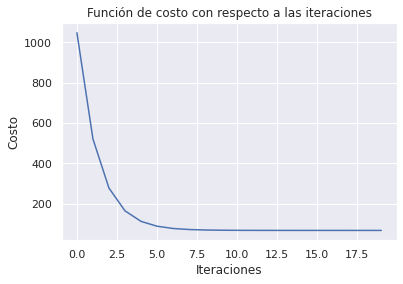

In [ ]:
alpha=0.000001
X = X.reshape([Y.size,1])  #Si hace falta rellenalo con uno

#Separación entre test y training
xTest, yTest, xEntrenamiento, yEntrenamiento =separacionDatos(X,Y)
theta = gradienteDescenso(xEntrenamiento, yEntrenamiento, alpha)

#### Gráfica para visualizar los datos

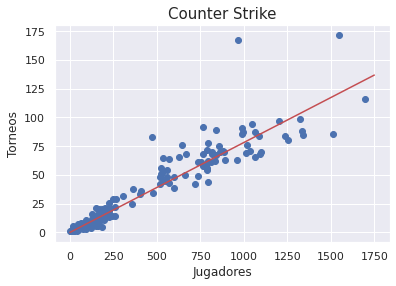

In [ ]:
X = Counter_Strike['Players'].values    #Con esto se forma un vector
Y = Counter_Strike['Tournaments'].values   # 
plt.scatter(X,Y)

x = np.linspace(0,1750,10)
y = theta[0] + theta[1]*x
plt.plot(x,y,'r')
plt.xlabel('Jugadores'), plt.ylabel('Torneos')
plt.title('Counter Strike', size=15)
plt.show()

In [ ]:
#Predecir el valor de algun dato en nuestro test Set
#Sólo está tomando los valores del test, no los noventa datos 
print('El valor en x es: ' + format(xTest[10])) 
print('El valor en y es: ' + format(yTest[10]))
yPredicho = theta[0]+theta[1]*xTest[10]
print('El valor predicho de y es: ' + format(yPredicho))

El valor en x es: [558.]
El valor en y es: 48.0
El valor predicho de y es: [43.65232262]


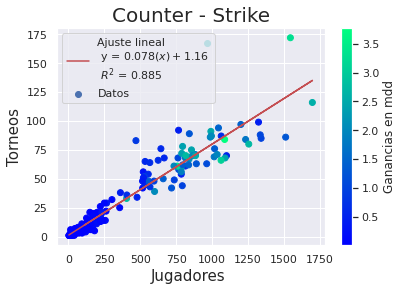

1.1611284376790039
0.07879115225381242
0.8850902168498156


In [261]:
#Algoritmo para conocer la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
#R_sq = .score(X,Y) 

X = Counter_Strike["Players"].values.reshape(-1,1)
Y = Counter_Strike["Tournaments"].values.reshape(-1,1)


modeloDeRegresion = LinearRegression() #
modeloDeRegresion.fit(X,Y) #Aquí lo entrenamos
theta1 = modeloDeRegresion.coef_[0][0]   #Theta cero
theta0 = modeloDeRegresion.intercept_[0] #Theta uno
R_sq = modeloDeRegresion.score(X,Y) 


yPredicha = modeloDeRegresion.predict(X) #Aquí vemos si ya salió 


plt.scatter(Counter_Strike["Players"],Counter_Strike["Tournaments"], label = 'Datos', 
            c = Counter_Strike["Earnings"], cmap = 'winter')
plt.colorbar(label= 'Ganancias en mdd')
plt.plot(X,yPredicha, 'r',  label='Ajuste lineal \n y = $0.078(x) + 1.16 $ \n $R^2$ = 0.885')

plt.xlabel('Jugadores ',fontsize = 15) 
plt.ylabel('Torneos',fontsize = 15) 
plt.title('Counter - Strike', fontsize = 20)
plt.legend()
plt.show()

print(theta0)
print(theta1)
print(R_sq)

#### Efectivamente estás dos variables están inequívocamente relacionadas, salvo algunos valores atípicos.

#### Lo que nos reitera que la cantidad de jugadores a hecho que crezca el número de torneos, hemos llegado a esta conclusión basándonos en nuestro proyecto anterior y aplicando técnicas de ML, nuestra hipótesis será ahora reforzada utilizando el Dataframe que elaboramos durante el módulo 3 con datos de los enfrentamientos.

In [ ]:
#Funciones necesarias para llamar al dataframe desde la API
import pandas as pd 
import math as mt
from datetime import *
import requests 

def PandaScore_get_matches(juego): #Definimos nuestra función
    if isinstance(juego, str): #Nos aseguramos que los argumentos sean de tipo str
        informacion = 'matches'
        registros = 100 #Establecemos el número de registros por página
        token = 'V3U1fnnWozJi3bbhZfrxdiAmN4-XWnX_4g6i_6iauwwh7w-V8Ns' #Token de acceso
        url = f"https://api.pandascore.co/{juego}/{informacion}?page[size]={registros}&token={token}" #URL con los parámetros deseados
        response = requests.get(url) #Realizamos la petición
        if response.status_code == 200: #Si todo salió bien continuamos
            Iteraciones = mt.ceil(float(response.headers['X-Total'])/registros) #Calculamos el número de páginas en base a todos los registros que hay en la API
            #Al dividir el número total de registros entre los registros solicitados obtenemos un aproximado, para asegurar que tomaremos todos, redondeamos al entero más alto
            for i in range(1,Iteraciones+1): #Ciclo for para obtener todos los registros de cada página
                url = f"https://api.pandascore.co/{juego}/{informacion}?page[size]={registros}&page[number]={i}&token=V3U1fnnWozJi3bbhZfrxdiAmN4-XWnX_4g6i_6iauwwh7w-V8Ns"
                #URL el parámetro de página deseada
                response = requests.get(url) #Realizamos la petición correspondiente
                data = response.json() #Transformamos la respuesta 
                if i == 1: #En la primer iteración se crea un Dataframe
                    df_matches = pd.DataFrame.from_dict(data)
                else: #En el resto de iteraciones se van añadiendo los nuevos registros
                    df_matches = df_matches.append(pd.DataFrame.from_dict(data),ignore_index=True)                    
            return df_matches # Finalmente se devuelve el Dataframe con todos los registros limpios y ordenados
        else: #Si la petición no se ejecutó correctamente mandamos un mensaje con el error devuelto
            return 'Error de petición: '+str(response.status_code)  
    else: #Si los argumentos no son de tipo str regresamos un mensaje
        return 'Por favor coloque un argumento válido en formato string.'



def df_matches_clean(df_matches):
  ########### Limpieza de datos
   campos_no_deseados = ['videogame', 'slug', 'tournament', 'league', 'serie', 'streams', 'modified_at', 'games',
                      'game_advantage', 'scheduled_at', 'original_scheduled_at', 'detailed_stats','live',
                      'match_type', 'videogame_version', 'live_embed_url', 'id'] 

   df_matches_temp = df_matches.drop(columns=campos_no_deseados) #Limpiamos campos que no nos son de utilidad
   df_matches_finished = df_matches_temp[ df_matches_temp['status'] == 'finished' ] #Dejamos solo los enfrentamientos que han terminado
   df_matches_finished_clean = df_matches_finished.dropna(subset=['begin_at', 'end_at']) #Eliminamos algunos valores nulos de las fechas
   df_matches_ordenado = df_matches_finished_clean[['name','opponents','results','forfeit','draw', #Reorganizamos los campos
                                                      'number_of_games','winner','winner_id','begin_at','end_at', 
                                                      'rescheduled','official_stream_url','league_id', 'serie_id', 'tournament_id']]
   df_matches_ordenado = df_matches_ordenado.reset_index(drop=True) #Reseteamos el índice
   nombres_nuevos = {'name' : 'match_name',
                             'begin_at' : 'begin_date',
                             'end_at' : 'end_date',
                             'official_stream_url' : 'official_stream_channel_url'}                       
   df_matches_ordenado.rename(columns=nombres_nuevos, inplace=True) #Renombramos columnas 
   return df_matches_ordenado

def winner_team(serie):
    if serie == None:
        return 'Undefined'
    else: return serie['name']

def loser_team(df):
    losers = []
    for i in range(0,len(df)):
        ganador = df['winner_team'][i]
        equipo = df['opponents'][i][0]['opponent']['name']
        if ganador == 'Undefined':
           losers.append('Undefined')
        elif equipo == ganador:
           losers.append(df['opponents'][i][1]['opponent']['name'])  
        elif equipo != ganador: 
           losers.append(df['opponents'][i][0]['opponent']['name'] )
    return pd.Series(losers,index=df.index)

def team_scores(df):
    losers_score = []
    winners_score = []
    for i in range(0,len(df)):
        ganador_id = df['winner_id'][i]
        equipo1_id = df['results'][i][0].get('team_id')
        equipo2_id = df['results'][i][1].get('team_id')
        if ganador_id == 0:
            winner_score = 0
            loser_score = 0
        elif equipo1_id == ganador_id:
            winner_score = df['results'][i][0].get('score')
            loser_score = df['results'][i][1].get('score')
        else:
            winner_score = df['results'][i][1].get('score')
            loser_score = df['results'][i][0].get('score')
        winners_score.append(winner_score)    
        losers_score.append(loser_score)
    return [pd.Series(winners_score,index=df.index), pd.Series(losers_score,index=df.index) ]

def matches_shiny(juego_matches):
    juego_matches['winner_team'] = juego_matches['winner'].map(winner_team)
    juego_matches['loser_team'] = loser_team(juego_matches)  
    juego_matches['winner_id'] = juego_matches['winner_id'].fillna(0)
    juego_matches['official_stream_channel_url'] = juego_matches['official_stream_channel_url'].fillna('Not Provided')
    juego_matches['winner_id'] = juego_matches['winner_id'].astype(int)
    [winner_score,loser_score] = team_scores(juego_matches)
    juego_matches['winner_score'] = winner_score
    juego_matches['loser_score'] = loser_score
    campos_no_deseados = ['results','winner','opponents','winner_id']
    juego_matches = juego_matches.drop(columns=campos_no_deseados)
    juego_matches['begin_date'] = juego_matches['begin_date'].apply(datetime.strptime, args=('%Y-%m-%dT%H:%M:%SZ',))
    juego_matches['end_date'] = juego_matches['end_date'].apply(datetime.strptime, args=('%Y-%m-%dT%H:%M:%SZ',))
    ljuego_matches = juego_matches.sort_values('begin_date', ascending=True)
    juego_matches = juego_matches.reset_index(drop=True)
    return juego_matches    

Llamemos al Dataframe que contiene información sobre los enfrentamientos de CSGO:

In [ ]:
csgo_matches_raw = PandaScore_get_matches('csgo')
csgo_matches_sin_nones = df_matches_clean(csgo_matches_raw)
csgo_matches = matches_shiny(csgo_matches_sin_nones)

In [ ]:
csgo_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score
0,Quarterfinal 3: Secret Club vs The Commission,False,False,3,2021-03-09 01:30:32,2021-03-09 04:34:01,False,Not Provided,4321,3420,5654,Secret Club,The Commission,2,1
1,Quarterfinal 2: Team Unknown vs RBG,False,False,3,2021-03-09 01:09:42,2021-03-09 02:20:00,False,Not Provided,4321,3420,5654,RBG,Team Unknown,2,0
2,Quarterfinal 1: Levitate vs Rebirth Esports,False,False,3,2021-03-09 01:09:40,2021-03-09 02:28:31,False,Not Provided,4321,3420,5654,Rebirth Esports,Levitate,2,0
3,Third Impact vs ImPerium,False,False,3,2021-03-09 02:17:22,2021-03-09 04:08:20,False,Not Provided,4243,3308,5425,Third Impact,ImPerium,2,0
4,Round of 16 match 8: RBG vs ImPerium,False,False,3,2021-03-08 23:10:22,2021-03-09 00:47:36,False,Not Provided,4321,3420,5654,RBG,ImPerium,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15120,Astralis vs North,False,False,3,2017-10-26 11:45:00,2017-10-26 14:12:00,False,Not Provided,4156,1562,1698,Astralis,North,2,0
15121,Semifinals 1: SK vs Astralis,False,False,3,2017-10-28 09:50:00,2017-10-28 12:41:00,False,Not Provided,4156,1562,1518,SK,Astralis,2,0
15122,Semifinals 2: G2 vs Virtus.pro,False,False,3,2017-10-28 13:50:00,2017-10-28 16:25:00,False,Not Provided,4156,1562,1518,Virtus.pro,G2,2,1
15123,3rd Place Match: Astralis vs G2,False,False,3,2017-10-29 09:30:00,2017-10-29 12:15:00,False,Not Provided,4156,1562,1518,G2,Astralis,2,1


Creemos un histórico con ayuda del campo _begin at_, empecemos creando un campo para los años: 

In [ ]:
csgo_matches['Year'] = csgo_matches.begin_date.dt.year

In [ ]:
csgo_matches

,match_name,forfeit,draw,number_of_games,begin_date,end_date,rescheduled,official_stream_channel_url,league_id,serie_id,tournament_id,winner_team,loser_team,winner_score,loser_score,Year
0,Quarterfinal 3: Secret Club vs The Commission,False,False,3,2021-03-09 01:30:32,2021-03-09 04:34:01,False,Not Provided,4321,3420,5654,Secret Club,The Commission,2,1,2021
1,Quarterfinal 2: Team Unknown vs RBG,False,False,3,2021-03-09 01:09:42,2021-03-09 02:20:00,False,Not Provided,4321,3420,5654,RBG,Team Unknown,2,0,2021
2,Quarterfinal 1: Levitate vs Rebirth Esports,False,False,3,2021-03-09 01:09:40,2021-03-09 02:28:31,False,Not Provided,4321,3420,5654,Rebirth Esports,Levitate,2,0,2021
3,Third Impact vs ImPerium,False,False,3,2021-03-09 02:17:22,2021-03-09 04:08:20,False,Not Provided,4243,3308,5425,Third Impact,ImPerium,2,0,2021
4,Round of 16 match 8: RBG vs ImPerium,False,False,3,2021-03-08 23:10:22,2021-03-09 00:47:36,False,Not Provided,4321,3420,5654,RBG,ImPerium,2,0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15120,Astralis vs North,False,False,3,2017-10-26 11:45:00,2017-10-26 14:12:00,False,Not Provided,4156,1562,1698,Astralis,North,2,0,2017
15121,Semifinals 1: SK vs Astralis,False,False,3,2017-10-28 09:50:00,2017-10-28 12:41:00,False,Not Provided,4156,1562,1518,SK,Astralis,2,0,2017
15122,Semifinals 2: G2 vs Virtus.pro,False,False,3,2017-10-28 13:50:00,2017-10-28 16:25:00,False,Not Provided,4156,1562,1518,Virtus.pro,G2,2,1,2017
15123,3rd Place Match: Astralis vs G2,False,False,3,2017-10-29 09:30:00,2017-10-29 12:15:00,False,Not Provided,4156,1562,1518,G2,Astralis,2,1,2017


Agrupemos el número de enfrentamientos del Dataframe por año para conocer el número de enfrentamientos anuales:

In [ ]:
enfrentamientos_por_año = csgo_matches.groupby(['Year']).size()
enfrentamientos_por_año = list(enfrentamientos_por_año)
enfrentamientos_por_año

[441, 489, 1167, 2817, 8698, 1513]

Revisamos los equipos que ganaron anualmente para conocer la cantidad de equipos que participó en cada uno:

In [ ]:
import numpy as np

equipos_por_año = csgo_matches.groupby(['Year'])['winner_team'].value_counts()
numero_equipos = []
for años in range(2016,2022):
    numero= len(equipos_por_año[años])
    numero_equipos.append(numero)

participantes_enfrentamientos = np.array(numero_equipos)*5   # Los equipos de CS:GO son de 5 integrantes
enfrentamientos_por_año = np.array(enfrentamientos_por_año)


Creamos un dataframe que contendrá información para un segundo modelo que nos ayudará a probar la hipótesis de correlación positiva:

In [ ]:
segundo_modelo = pd.DataFrame({ 'Matches' : enfrentamientos_por_año, 'Players':participantes_enfrentamientos}, index=[2016,2017,2018,2019,2020,2021])
segundo_modelo

,Matches,Players
2016,441,160
2017,489,155
2018,1167,295
2019,2817,1545
2020,8698,2965
2021,1513,1470


Lamentablemente por la forma en que se recolectaron los datos de la API tendremos datos desde el año 2016, probemos estos datos:

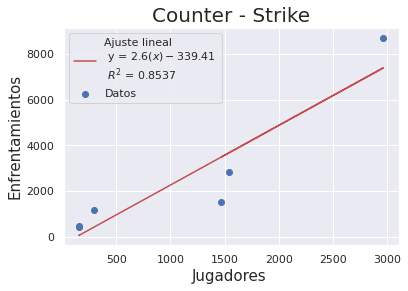

-339.4178046688585
2.6041740254951673
0.8537807604540675


In [263]:
#Algoritmo para conocer la regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
#R_sq = .score(X,Y) 

X = segundo_modelo["Players"].values.reshape(-1,1)
Y = segundo_modelo["Matches"].values.reshape(-1,1)


modeloDeRegresion = LinearRegression() #
modeloDeRegresion.fit(X,Y) #Aquí lo entrenamos
theta1 = modeloDeRegresion.coef_[0][0]   #Theta cero
theta0 = modeloDeRegresion.intercept_[0] #Theta uno
R_sq = modeloDeRegresion.score(X,Y) 


yPredicha = modeloDeRegresion.predict(X) #Aquí vemos si ya salió 


plt.scatter(segundo_modelo["Players"],segundo_modelo["Matches"], label = 'Datos')
plt.plot(X,yPredicha, 'r',  label='Ajuste lineal \n y = $2.6(x) - 339.41 $ \n $R^2$ = 0.8537')

plt.xlabel('Jugadores ',fontsize = 15) 
plt.ylabel('Enfrentamientos',fontsize = 15) 
plt.title('Counter - Strike', fontsize = 20)
plt.legend()
plt.show()

print(theta0)
print(theta1)
print(R_sq)

!Observamos una correlación positiva nuevamente¡ :)

# Conclusiones

Observando los resultados obtenido en los análisis de correlación, tanto para los jugadores que ha habido por número de torneos que obtuvimos de una segunda revisión a los datasets de nuestro proyecto anterior, como para los jugadores que ha habido por número de enfrentamientos que obtuvimos de la API PandaScore, podemos responder a la pregunta:

**Los juegos que hoy en día son eSports, ¿lo seguirán siendo en el futuro?**

La respuesta, al menos para Counter Strike: Global Offensive, es un rotundo sí. Encontramos que a lo largo de los años se (desde 2010 a 2020 para los torneos y de 2016 a 2021 para los enfrentamientos) CS:GO no ha dejado de atraer a participantes a sus eventos, la escena competitiva goza de buena salud a pesar de haber sufrido una caída en el año 2020.

<p align="center">
<img src="https://lasclasesdetic1819g07com.files.wordpress.com/2019/01/counter-strike-upcoming-events-for-2017.jpg"  height ="250" width = "400" alt=csgo>
</p>


